In [ ]:
import Matplotlib.pyplot as plt
import NetworkX as nx

N = 10
G = nx.grid_2d_graph(N, N)
nx.draw(G, with_labels = 1)
plt.show()
print G.nodes()

In [2]:
pos = dict((n, n) for n in G.nodes())
print pos

{(7, 3): (7, 3), (6, 9): (6, 9), (0, 7): (0, 7), (1, 6): (1, 6), (3, 7): (3, 7), (2, 5): (2, 5), (8, 5): (8, 5), (5, 8): (5, 8), (4, 0): (4, 0), (9, 0): (9, 0), (6, 7): (6, 7), (5, 5): (5, 5), (7, 6): (7, 6), (0, 4): (0, 4), (1, 1): (1, 1), (3, 2): (3, 2), (2, 6): (2, 6), (8, 2): (8, 2), (4, 5): (4, 5), (9, 3): (9, 3), (6, 0): (6, 0), (7, 5): (7, 5), (0, 1): (0, 1), (3, 1): (3, 1), (9, 9): (9, 9), (7, 8): (7, 8), (2, 1): (2, 1), (8, 9): (8, 9), (9, 4): (9, 4), (5, 1): (5, 1), (7, 2): (7, 2), (1, 5): (1, 5), (3, 6): (3, 6), (2, 2): (2, 2), (8, 6): (8, 6), (4, 1): (4, 1), (9, 7): (9, 7), (6, 4): (6, 4), (5, 4): (5, 4), (7, 1): (7, 1), (0, 5): (0, 5), (1, 0): (1, 0), (0, 8): (0, 8), (3, 5): (3, 5), (2, 7): (2, 7), (8, 3): (8, 3), (4, 6): (4, 6), (9, 2): (9, 2), (6, 1): (6, 1), (5, 7): (5, 7), (7, 4): (7, 4), (0, 2): (0, 2), (1, 3): (1, 3), (4, 8): (4, 8), (3, 0): (3, 0), (2, 8): (2, 8), (9, 8): (9, 8), (8, 0): (8, 0), (6, 2): (6, 2), (5, 0): (5, 0), (1, 4): (1, 4), (3, 9): (3, 9), (2, 3):

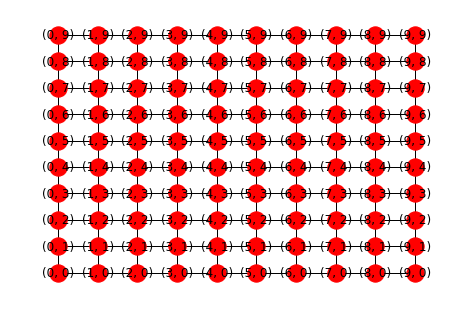

In [3]:
nx.draw(G, pos, with_labels = 1)
plt.show()

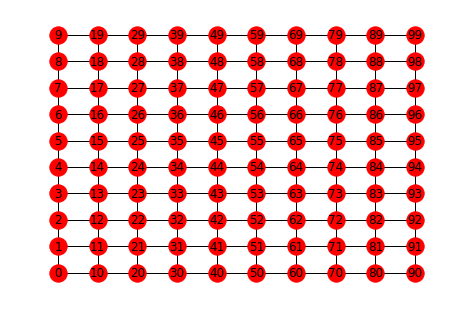

In [4]:
labels = dict(((i, j), i*10 + j) for i,j in G.nodes())
nx.draw(G, pos, with_labels = 1, labels = labels)
plt.show()


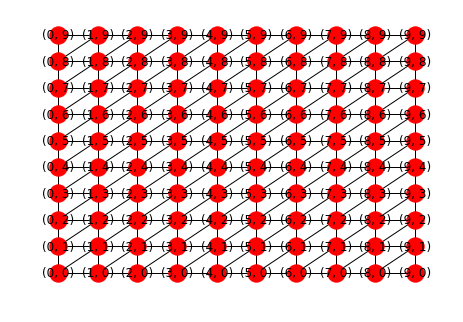

In [5]:
for (u, v) in G.nodes():
    if (u+1 <= N-1) and (v+1 <= N-1):
        G.add_edge((u, v), (u+1, v+1))

nx.draw(G, pos, with_labels = 1)
plt.show()

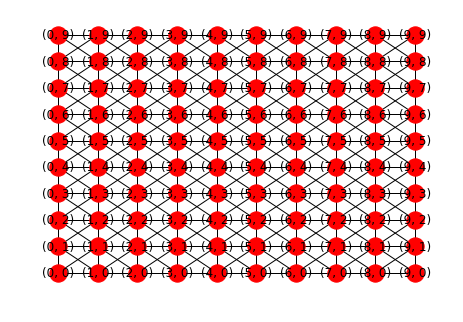

In [6]:
for (u, v) in G.nodes():
    if (u+1 <= N-1) and (v-1 >= 0):
        G.add_edge((u, v), (u+1, v-1))

nx.draw(G, pos, with_labels = 1)
plt.show()

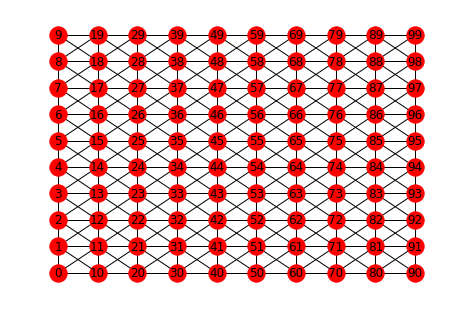

In [7]:
nx.draw(G, pos, labels = labels, with_labels = 1)
plt.show()

## Lec59 Schelling Model Implementation : Visualization and getting a list of boundary and intenal nodes

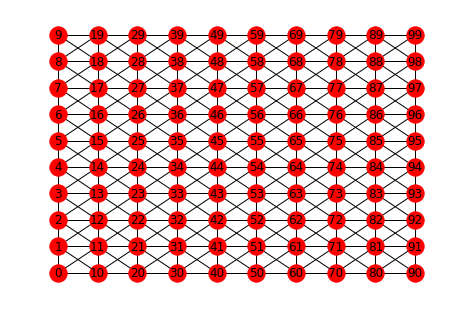

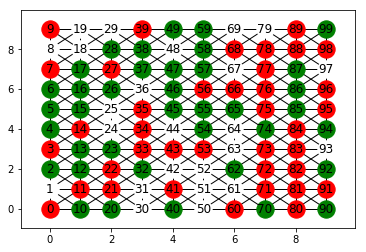

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import random as rd

N = 10
G = nx.grid_2d_graph(N, N)
pos = dict((n, n) for n in G.nodes())
labels = dict(((i, j), i*10 + j) for i,j in G.nodes())

def display_graph(G):
    nodes_g = nx.draw_networkx_nodes(G, pos, node_color = 'green', nodelist = type1_nodes)
    nodes_r = nx.draw_networkx_nodes(G, pos, node_color = 'red', nodelist = type2_nodes)
    nodes_w = nx.draw_networkx_nodes(G, pos, node_color = 'white', nodelist = empty_cells)
    
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos, labels = labels)
    plt.show()
    

#Add diagonal edges
for (u, v) in G.nodes():
    if (u+1 <= N-1) and (v+1 <= N-1):
        G.add_edge((u, v), (u+1, v+1))

for (u, v) in G.nodes():
    if (u+1 <= N-1) and (v-1 >= 0):
        G.add_edge((u, v), (u+1, v-1))

nx.draw(G, pos, labels = labels, with_labels = 1)
plt.show()

for n in G.nodes():
    G.node[n]['type'] = rd.randint(0, 2)
    
type1_nodes = [n for (n, d) in G.nodes(data = True) if d['type'] == 1]
type2_nodes = [n for (n, d) in G.nodes(data = True) if d['type'] == 2]
empty_cells = [n for (n, d) in G.nodes(data = True) if d['type'] == 0]

#print type1_nodes
#print type2_nodes
#print empty_cells

display_graph(G)

In [9]:
def display_graph(G):
    nodes_g = nx.draw_networkx_nodes(G, pos, node_color = 'green', nodelist = type1_nodes)
    nodes_r = nx.draw_networkx_nodes(G, pos, node_color = 'red', nodelist = type2_nodes)
    nodes_w = nx.draw_networkx_nodes(G, pos, node_color = 'white', nodelist = empty_cells)
    
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos, labels = labels)
    plt.show()
    

In [10]:
def get_boundary_nodes():
    boundary_nodes_list = []
    for u, v in G.nodes():
        if u == 0 or v == 0 or v == N-1 or u == N-1:
            boundary_nodes_list.append((u, v))
            #print  (u, v), " appended"
    return boundary_nodes_list

boundary_nodes = get_boundary_nodes()
internal_nodes = list(set(G.nodes()) - set(boundary_nodes))

print boundary_nodes
print internal_nodes


[(6, 9), (0, 7), (4, 0), (9, 0), (0, 4), (9, 3), (6, 0), (0, 1), (9, 9), (8, 9), (9, 4), (9, 7), (0, 5), (1, 0), (0, 8), (9, 2), (0, 2), (3, 0), (9, 8), (8, 0), (5, 0), (3, 9), (1, 9), (9, 6), (7, 0), (0, 6), (0, 9), (5, 9), (9, 1), (0, 3), (4, 9), (2, 9), (0, 0), (7, 9), (2, 0), (9, 5)]
[(7, 3), (4, 7), (5, 7), (4, 8), (5, 6), (2, 8), (5, 4), (2, 1), (1, 3), (1, 6), (3, 7), (5, 1), (2, 5), (8, 5), (7, 2), (1, 2), (3, 8), (6, 7), (5, 5), (8, 1), (7, 6), (6, 6), (4, 4), (6, 3), (1, 5), (8, 8), (3, 3), (5, 8), (3, 6), (2, 2), (8, 6), (5, 3), (4, 1), (1, 1), (6, 4), (3, 2), (2, 6), (8, 2), (7, 1), (4, 5), (1, 4), (7, 7), (7, 5), (2, 3), (8, 7), (6, 8), (4, 2), (6, 5), (3, 5), (2, 7), (8, 3), (4, 6), (3, 4), (6, 1), (3, 1), (5, 2), (7, 4), (1, 8), (6, 2), (4, 3), (1, 7), (7, 8), (2, 4), (8, 4)]


## Lec60 Schelling Model Implementation : Getting a list of unsatisfied nodes


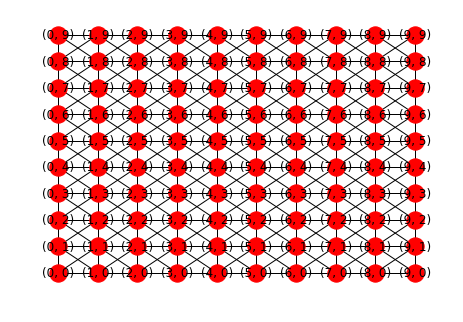

In [12]:
nx.draw(G, pos, with_labels = 1)
plt.show()

In [13]:
def get_neigh_for_internal(u, v):
    return [(u-1, v),(u+1, v),(u, v-1),(u, v+1),(u-1, v+1),(u+1, v-1),(u-1, v-1),(u+1, v+1)]

def get_neigh_for_boundary(u, v):
    # global N
    # print 'uv', u, v
    if u == 0 and v == 0:
        return [(0, 1),(1, 1), (1, 0)]
    elif u == N-1 and v == N-1:
        return [(N-2, N-2), (N-1, N-2), (N-2, N-1)]
    elif u == N-1 and v == 0:
        return [(u-1, v), (u,v+1), (u-1, v+1)]
    elif u == 0 and v == N-1:
        return [(u+1, v), (u+1, v-1), (u, v-1)]
    elif u == 0:
        return [(u, v-1), (u, v+1), (u+1, v), (u+1, v-1), (u+1, v+1)]
    elif u == N-1:
        return [(u-1, v), (u, v-1), (u, v+1), (u-1, v+1), (u-1, v-1)]
    elif v == N-1:
        return [(u, v-1), (u-1, v), (u+1, v), (u-1, v-1), (u+1, v-1)]
    elif v == 0:
        return [(u-1, v), (u+1, v), (u, v+1), (u-1, v+1), (u+1, v+1)]


In [15]:
def get_unsatified_nodes_list(G,internal_nodes, boundary_nodes):
    unsatified_nodes_list = []
    for u,v in G.nodes():
        type_of_this_node = G.node[(u, v)]['type']
        if type_of_this_node == 0:
            continue
        else:
            similar_nodes = 0
            if (u, v) in internal_nodes:
                neigh = get_neigh_for_internal(u, v)
            elif (u, v) in boundary_nodes:
                neigh = get_neigh_for_boundary(u, v)
                
            for each in neigh:
                if G.node[each]['type'] == type_of_this_node:
                    similar_nodes += 1
                    
            if similar_nodes <= t:
                unsatified_nodes_list.append((u, v))
                
    return unsatified_nodes_list     
        

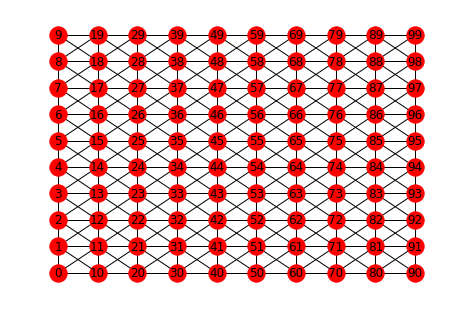

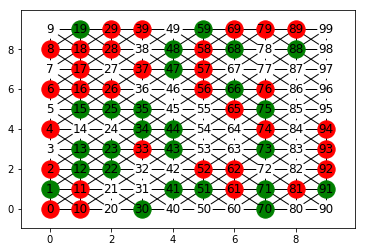

[(7, 3), (6, 9), (1, 6), (3, 7), (2, 5), (5, 8), (7, 6), (0, 4), (1, 1), (2, 6), (9, 3), (7, 5), (0, 1), (8, 9), (9, 4), (5, 1), (1, 5), (2, 2), (4, 1), (7, 1), (1, 0), (0, 8), (3, 5), (9, 2), (6, 1), (5, 7), (7, 4), (0, 2), (1, 3), (4, 8), (3, 0), (6, 2), (3, 9), (1, 9), (6, 5), (7, 0), (6, 8), (0, 6), (5, 9), (4, 7), (9, 1), (6, 6), (5, 6), (3, 3), (2, 9), (8, 1), (4, 4), (0, 0), (7, 9), (8, 8), (4, 3), (5, 2)]


In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import random as rd

N = 10
G = nx.grid_2d_graph(N, N)
pos = dict((n, n) for n in G.nodes())
labels = dict(((i, j), i*10 + j) for i,j in G.nodes())

def display_graph(G):
    nodes_g = nx.draw_networkx_nodes(G, pos, node_color = 'green', nodelist = type1_nodes)
    nodes_r = nx.draw_networkx_nodes(G, pos, node_color = 'red', nodelist = type2_nodes)
    nodes_w = nx.draw_networkx_nodes(G, pos, node_color = 'white', nodelist = empty_cells)
    
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos, labels = labels)
    plt.show()
    
def get_boundary_nodes():
    boundary_nodes_list = []
    for u, v in G.nodes():
        if u == 0 or v == 0 or v == N-1 or u == N-1:
            boundary_nodes_list.append((u, v))
            #print  (u, v), " appended"
    return boundary_nodes_list
    
def get_neigh_for_internal(u, v):
    return [(u-1, v),(u+1, v),(u, v-1),(u, v+1),(u-1, v+1),(u+1, v-1),(u-1, v-1),(u+1, v+1)]

def get_neigh_for_boundary(u, v):
    # global N
    # print 'uv', u, v
    if u == 0 and v == 0:
        return [(0, 1),(1, 1), (1, 0)]
    elif u == N-1 and v == N-1:
        return [(N-2, N-2), (N-1, N-2), (N-2, N-1)]
    elif u == N-1 and v == 0:
        return [(u-1, v), (u,v+1), (u-1, v+1)]
    elif u == 0 and v == N-1:
        return [(u+1, v), (u+1, v-1), (u, v-1)]
    elif u == 0:
        return [(u, v-1), (u, v+1), (u+1, v), (u+1, v-1), (u+1, v+1)]
    elif u == N-1:
        return [(u-1, v), (u, v-1), (u, v+1), (u-1, v+1), (u-1, v-1)]
    elif v == N-1:
        return [(u, v-1), (u-1, v), (u+1, v), (u-1, v-1), (u+1, v-1)]
    elif v == 0:
        return [(u-1, v), (u+1, v), (u, v+1), (u-1, v+1), (u+1, v+1)]

    
def get_unsatified_nodes_list(G,internal_nodes, boundary_nodes):
    unsatified_nodes_list = []
    t = 3
    for u,v in G.nodes():
        type_of_this_node = G.node[(u, v)]['type']
        if type_of_this_node == 0:
            continue
        else:
            similar_nodes = 0
            if (u, v) in internal_nodes:
                neigh = get_neigh_for_internal(u, v)
            elif (u, v) in boundary_nodes:
                neigh = get_neigh_for_boundary(u, v)
                
            for each in neigh:
                if G.node[each]['type'] == type_of_this_node:
                    similar_nodes += 1
                    
            if similar_nodes <= t:
                unsatified_nodes_list.append((u, v))
                
    return unsatified_nodes_list     
        
    

#Add diagonal edges
for (u, v) in G.nodes():
    if (u+1 <= N-1) and (v+1 <= N-1):
        G.add_edge((u, v), (u+1, v+1))

for (u, v) in G.nodes():
    if (u+1 <= N-1) and (v-1 >= 0):
        G.add_edge((u, v), (u+1, v-1))

nx.draw(G, pos, labels = labels, with_labels = 1)
plt.show()

for n in G.nodes():
    G.node[n]['type'] = rd.randint(0, 2)
    
type1_nodes = [n for (n, d) in G.nodes(data = True) if d['type'] == 1]
type2_nodes = [n for (n, d) in G.nodes(data = True) if d['type'] == 2]
empty_cells = [n for (n, d) in G.nodes(data = True) if d['type'] == 0]

#print type1_nodes
#print type2_nodes
#print empty_cells

display_graph(G)

boundary_nodes = get_boundary_nodes()
internal_nodes = list(set(G.nodes()) - set(boundary_nodes))

#print boundary_nodes
#print internal_nodes

unsatified_nodes_list = get_unsatified_nodes_list(G, internal_nodes, boundary_nodes)
print unsatified_nodes_list





## Lec61 Schelling Model Implementation : Shifting the unsatified nodes and visualizing the final graph



In [19]:
def make_a_node_satisfied(unsatisfied_node_list, empty_cells):
    if len(unsatified_nodes_list)!= 0:
        node_to_shift = rd.choice(unsatisfied_node_list)
        new_position = rd.choice(empty_cells)
        
        G.node[new_position]['type'] = G.node[node_to_shift]['type']
        G.node[node_to_shift]['type'] = 0
        labels[node_to_shift], labels[new_position] = labels[new_position], labels[node_to_shift]
    else:
        pass

        
        
#make_a_node_satisfied(unsatisfied_node_list, empty_cells)
#type1_nodes = [n for (n, d) in G.nodes(data = True) if d['type'] == 1]
#type2_nodes = [n for (n, d) in G.nodes(data = True) if d['type'] == 2]
#empty_cells = [n for (n, d) in G.nodes(data = True) if d['type'] == 0]


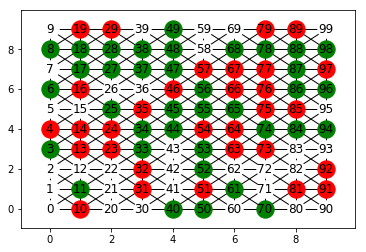

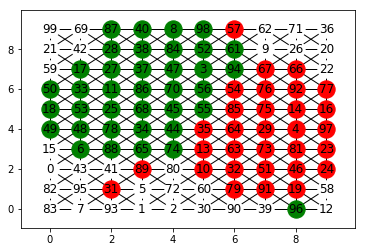

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
import random as rd

N = 10
G = nx.grid_2d_graph(N, N)
pos = dict((n, n) for n in G.nodes())
labels = dict(((i, j), i*10 + j) for i,j in G.nodes())

def display_graph(G):
    nodes_g = nx.draw_networkx_nodes(G, pos, node_color = 'green', nodelist = type1_nodes)
    nodes_r = nx.draw_networkx_nodes(G, pos, node_color = 'red', nodelist = type2_nodes)
    nodes_w = nx.draw_networkx_nodes(G, pos, node_color = 'white', nodelist = empty_cells)
    
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos, labels = labels)
    plt.show()
    
def get_boundary_nodes():
    boundary_nodes_list = []
    for u, v in G.nodes():
        if u == 0 or v == 0 or v == N-1 or u == N-1:
            boundary_nodes_list.append((u, v))
            #print  (u, v), " appended"
    return boundary_nodes_list
    
def get_neigh_for_internal(u, v):
    return [(u-1, v),(u+1, v),(u, v-1),(u, v+1),(u-1, v+1),(u+1, v-1),(u-1, v-1),(u+1, v+1)]

def get_neigh_for_boundary(u, v):
    # global N
    # print 'uv', u, v
    if u == 0 and v == 0:
        return [(0, 1),(1, 1), (1, 0)]
    elif u == N-1 and v == N-1:
        return [(N-2, N-2), (N-1, N-2), (N-2, N-1)]
    elif u == N-1 and v == 0:
        return [(u-1, v), (u,v+1), (u-1, v+1)]
    elif u == 0 and v == N-1:
        return [(u+1, v), (u+1, v-1), (u, v-1)]
    elif u == 0:
        return [(u, v-1), (u, v+1), (u+1, v), (u+1, v-1), (u+1, v+1)]
    elif u == N-1:
        return [(u-1, v), (u, v-1), (u, v+1), (u-1, v+1), (u-1, v-1)]
    elif v == N-1:
        return [(u, v-1), (u-1, v), (u+1, v), (u-1, v-1), (u+1, v-1)]
    elif v == 0:
        return [(u-1, v), (u+1, v), (u, v+1), (u-1, v+1), (u+1, v+1)]

    
def get_unsatified_nodes_list(G,internal_nodes, boundary_nodes):
    unsatified_nodes_list = []
    t = 3
    for u,v in G.nodes():
        type_of_this_node = G.node[(u, v)]['type']
        if type_of_this_node == 0:
            continue
        else:
            similar_nodes = 0
            if (u, v) in internal_nodes:
                neigh = get_neigh_for_internal(u, v)
            elif (u, v) in boundary_nodes:
                neigh = get_neigh_for_boundary(u, v)
                
            for each in neigh:
                if G.node[each]['type'] == type_of_this_node:
                    similar_nodes += 1
                    
            if similar_nodes <= t:
                unsatified_nodes_list.append((u, v))
                
    return unsatified_nodes_list 

def make_a_node_satisfied(unsatisfied_node_list, empty_cells):
    if len(unsatified_nodes_list)!= 0:
        node_to_shift = rd.choice(unsatisfied_node_list)
        new_position = rd.choice(empty_cells)
        
        G.node[new_position]['type'] = G.node[node_to_shift]['type']
        G.node[node_to_shift]['type'] = 0
        labels[node_to_shift], labels[new_position] = labels[new_position], labels[node_to_shift]
    else:
        pass
        
    

#Add diagonal edges
for (u, v) in G.nodes():
    if (u+1 <= N-1) and (v+1 <= N-1):
        G.add_edge((u, v), (u+1, v+1))

for (u, v) in G.nodes():
    if (u+1 <= N-1) and (v-1 >= 0):
        G.add_edge((u, v), (u+1, v-1))

#nx.draw(G, pos, labels = labels, with_labels = 1)
#plt.show()

for n in G.nodes():
    G.node[n]['type'] = rd.randint(0, 2)
    
type1_nodes = [n for (n, d) in G.nodes(data = True) if d['type'] == 1]
type2_nodes = [n for (n, d) in G.nodes(data = True) if d['type'] == 2]
empty_cells = [n for (n, d) in G.nodes(data = True) if d['type'] == 0]

#print type1_nodes
#print type2_nodes
#print empty_cells

display_graph(G)

boundary_nodes = get_boundary_nodes()
internal_nodes = list(set(G.nodes()) - set(boundary_nodes))

#print boundary_nodes
#print internal_nodes

for i in range(1000):
    unsatisfied_nodes_list = get_unsatified_nodes_list(G, internal_nodes, boundary_nodes)
    #print unsatified_nodes_list

    make_a_node_satisfied(unsatisfied_nodes_list, empty_cells)
    type1_nodes = [n for (n, d) in G.nodes(data = True) if d['type'] == 1]
    type2_nodes = [n for (n, d) in G.nodes(data = True) if d['type'] == 2]
    empty_cells = [n for (n, d) in G.nodes(data = True) if d['type'] == 0]

display_graph(G)
